In [1]:
!pip install xgboost
!pip install lightgbm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
tdr = pd.read_csv('한국가스공사_도시가스 TDR_20201231.csv', encoding='cp949')
time = pd.read_csv('한국가스공사_시간별 공급량_20181231.csv', encoding='cp949')
year = pd.read_csv('한국가스공사_연도별 일일 최대 공급량_20210108.csv', encoding='cp949')
month = pd.read_csv('한국가스공사_월별 일평균 천연가스 공급량_20201231.csv', encoding='cp949')
area = pd.read_csv('한국가스공사_월별 지역본부별 천연가스 공급량_20201231.csv', encoding='utf-8')
mm = pd.read_csv('한국가스공사_천연가스 최대,최소 공급량_12_31_2020.csv', encoding='cp949')

# tdr(연중 최대사용량/최저사용량)

In [4]:
tdr

,연도,도시가스
0,1991,4.8
1,1992,5.7
2,1993,5.6
3,1994,6.5
4,1995,6.5
5,1996,6.1
6,1997,4.9
7,1998,4.5
8,1999,4.6
9,2000,4.0


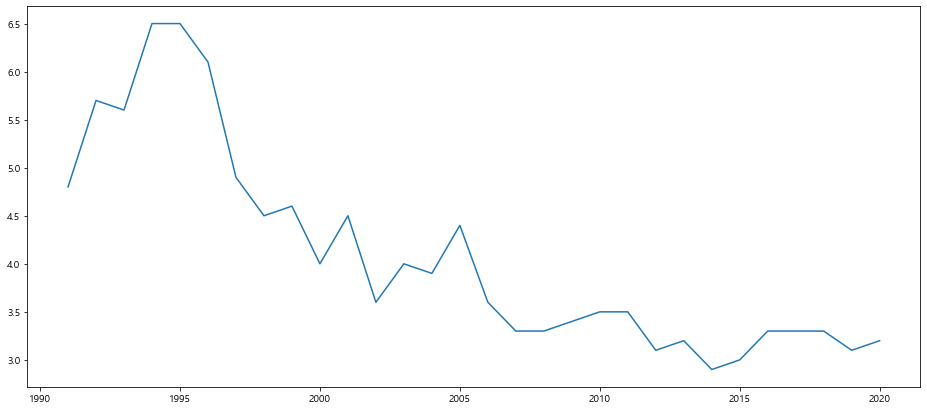

In [5]:
plt.figure(figsize=(16,7))
plt.plot(tdr['연도'],tdr['도시가스'])

# 시간별

In [4]:
time.head()

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105


In [5]:
time['구분'].value_counts()

E    52584
G    52584
D    52584
H    52584
A    52584
B    52584
C    52584
Name: 구분, dtype: int64

In [6]:
time['구분'].unique()

array(['A', 'B', 'C', 'D', 'E', 'G', 'H'], dtype=object)

In [7]:
time=pd.get_dummies(data = time, columns = ['구분'])

In [8]:
time['연월일'] = pd.to_datetime(time['연월일'])

In [9]:
time['year'] = time['연월일'].dt.year
time['month'] = time['연월일'].dt.month
time['day'] = time['연월일'].dt.day

In [10]:
time

,연월일,시간,공급량,구분_A,구분_B,구분_C,구분_D,구분_E,구분_G,구분_H,year,month,day
0,2013-01-01,1,2497.129,1,0,0,0,0,0,0,2013,1,1
1,2013-01-01,2,2363.265,1,0,0,0,0,0,0,2013,1,1
2,2013-01-01,3,2258.505,1,0,0,0,0,0,0,2013,1,1
3,2013-01-01,4,2243.969,1,0,0,0,0,0,0,2013,1,1
4,2013-01-01,5,2344.105,1,0,0,0,0,0,0,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368083,2018-12-31,20,681.033,0,0,0,0,0,0,1,2018,12,31
368084,2018-12-31,21,669.961,0,0,0,0,0,0,1,2018,12,31
368085,2018-12-31,22,657.941,0,0,0,0,0,0,1,2018,12,31
368086,2018-12-31,23,610.953,0,0,0,0,0,0,1,2018,12,31


In [11]:
for i in range(1,13):
    globals()['mon{}'.format(i)]=time[time['month']==i]

In [12]:
mon1

,연월일,시간,공급량,구분_A,구분_B,구분_C,구분_D,구분_E,구분_G,구분_H,year,month,day
0,2013-01-01,1,2497.129,1,0,0,0,0,0,0,2013,1,1
1,2013-01-01,2,2363.265,1,0,0,0,0,0,0,2013,1,1
2,2013-01-01,3,2258.505,1,0,0,0,0,0,0,2013,1,1
3,2013-01-01,4,2243.969,1,0,0,0,0,0,0,2013,1,1
4,2013-01-01,5,2344.105,1,0,0,0,0,0,0,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360067,2018-01-31,20,726.094,0,0,0,0,0,0,1,2018,1,31
360068,2018-01-31,21,730.813,0,0,0,0,0,0,1,2018,1,31
360069,2018-01-31,22,717.518,0,0,0,0,0,0,1,2018,1,31
360070,2018-01-31,23,666.122,0,0,0,0,0,0,1,2018,1,31


In [13]:
def out(df):
    a = []
    Q1 = np.percentile(df['공급량'], 25)
    Q3 = np.percentile(df['공급량'], 75)
    IQR = Q3 - Q1
        
    b = df[(df['공급량'] < Q1 - 1.5*IQR) | (df['공급량'] > Q3 + 1.5*IQR)].index
    a.extend(b)
    
    return a

In [14]:
time.loc[out(mon1)]

,연월일,시간,공급량,구분_A,구분_B,구분_C,구분_D,구분_E,구분_G,구분_H,year,month,day
43879,2013-01-04,8,5850.717,0,0,0,0,0,1,0,2013,1,4
43880,2013-01-04,9,5881.765,0,0,0,0,0,1,0,2013,1,4
44447,2013-01-27,24,10207.077,0,0,0,0,0,1,0,2013,1,27
237217,2016-01-24,2,6644.788,0,0,0,0,0,0,1,2016,1,24
350827,2018-01-11,20,6012.545,0,0,0,0,0,1,0,2018,1,11
350828,2018-01-11,21,5962.840,0,0,0,0,0,1,0,2018,1,11
350829,2018-01-11,22,5918.506,0,0,0,0,0,1,0,2018,1,11
350839,2018-01-12,8,5940.238,0,0,0,0,0,1,0,2018,1,12
350840,2018-01-12,9,6071.554,0,0,0,0,0,1,0,2018,1,12
351115,2018-01-23,20,5908.801,0,0,0,0,0,1,0,2018,1,23


In [15]:
b=[mon1,mon2,mon3,mon4,mon5,mon6,mon7,mon8,mon9,mon10,mon11,mon12]
for i in range(1,13):
    globals()['mon_out_{}'.format(i)]=time.loc[out(b[i-1])]

In [16]:
mon_out_1.loc[out(mon_out_1)]

,연월일,시간,공급량,구분_A,구분_B,구분_C,구분_D,구분_E,구분_G,구분_H,year,month,day
44447,2013-01-27,24,10207.077,0,0,0,0,0,1,0,2013,1,27


In [17]:
c=[mon_out_1,mon_out_2,mon_out_3,mon_out_4,mon_out_5,mon_out_6,
   mon_out_7,mon_out_8,mon_out_9,mon_out_10,mon_out_11,mon_out_12]
for i in range(1,13):
    globals()['drop_mon_{}'.format(i)]=out(c[i-1])
drop_mon_1

[44447]

In [18]:
time = time.drop(drop_mon_1, axis = 0).reset_index(drop=True)
time = time.drop(drop_mon_2, axis = 0).reset_index(drop=True)
time = time.drop(drop_mon_3, axis = 0).reset_index(drop=True)
time = time.drop(drop_mon_4, axis = 0).reset_index(drop=True)
time = time.drop(drop_mon_5, axis = 0).reset_index(drop=True)
time = time.drop(drop_mon_6, axis = 0).reset_index(drop=True)
time = time.drop(drop_mon_7, axis = 0).reset_index(drop=True)
time = time.drop(drop_mon_8, axis = 0).reset_index(drop=True)
time = time.drop(drop_mon_9, axis = 0).reset_index(drop=True)
time = time.drop(drop_mon_10, axis = 0).reset_index(drop=True)
time = time.drop(drop_mon_11, axis = 0).reset_index(drop=True)
time = time.drop(drop_mon_12, axis = 0).reset_index(drop=True)

In [19]:
time

,연월일,시간,공급량,구분_A,구분_B,구분_C,구분_D,구분_E,구분_G,구분_H,year,month,day
0,2013-01-01,1,2497.129,1,0,0,0,0,0,0,2013,1,1
1,2013-01-01,2,2363.265,1,0,0,0,0,0,0,2013,1,1
2,2013-01-01,3,2258.505,1,0,0,0,0,0,0,2013,1,1
3,2013-01-01,4,2243.969,1,0,0,0,0,0,0,2013,1,1
4,2013-01-01,5,2344.105,1,0,0,0,0,0,0,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367903,2018-12-31,20,681.033,0,0,0,0,0,0,1,2018,12,31
367904,2018-12-31,21,669.961,0,0,0,0,0,0,1,2018,12,31
367905,2018-12-31,22,657.941,0,0,0,0,0,0,1,2018,12,31
367906,2018-12-31,23,610.953,0,0,0,0,0,0,1,2018,12,31


In [20]:
time=pd.get_dummies(data = time, columns = ['month'])

In [21]:
time

,연월일,시간,공급량,구분_A,구분_B,구분_C,구분_D,구분_E,구분_G,구분_H,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2013-01-01,1,2497.129,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013-01-01,2,2363.265,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013-01-01,3,2258.505,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2013-01-01,4,2243.969,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013-01-01,5,2344.105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367903,2018-12-31,20,681.033,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
367904,2018-12-31,21,669.961,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
367905,2018-12-31,22,657.941,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
367906,2018-12-31,23,610.953,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [22]:
time.columns

Index(['연월일', '시간', '공급량', '구분_A', '구분_B', '구분_C', '구분_D', '구분_E', '구분_G',
       '구분_H', 'year', 'day', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'],
      dtype='object')

In [101]:
heatmap_data = time[['시간', '구분_A', '구분_B', '구분_C', '구분_D', '구분_E', '구분_G',
       '구분_H', 'year', 'day', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12','공급량']]

<AxesSubplot:>

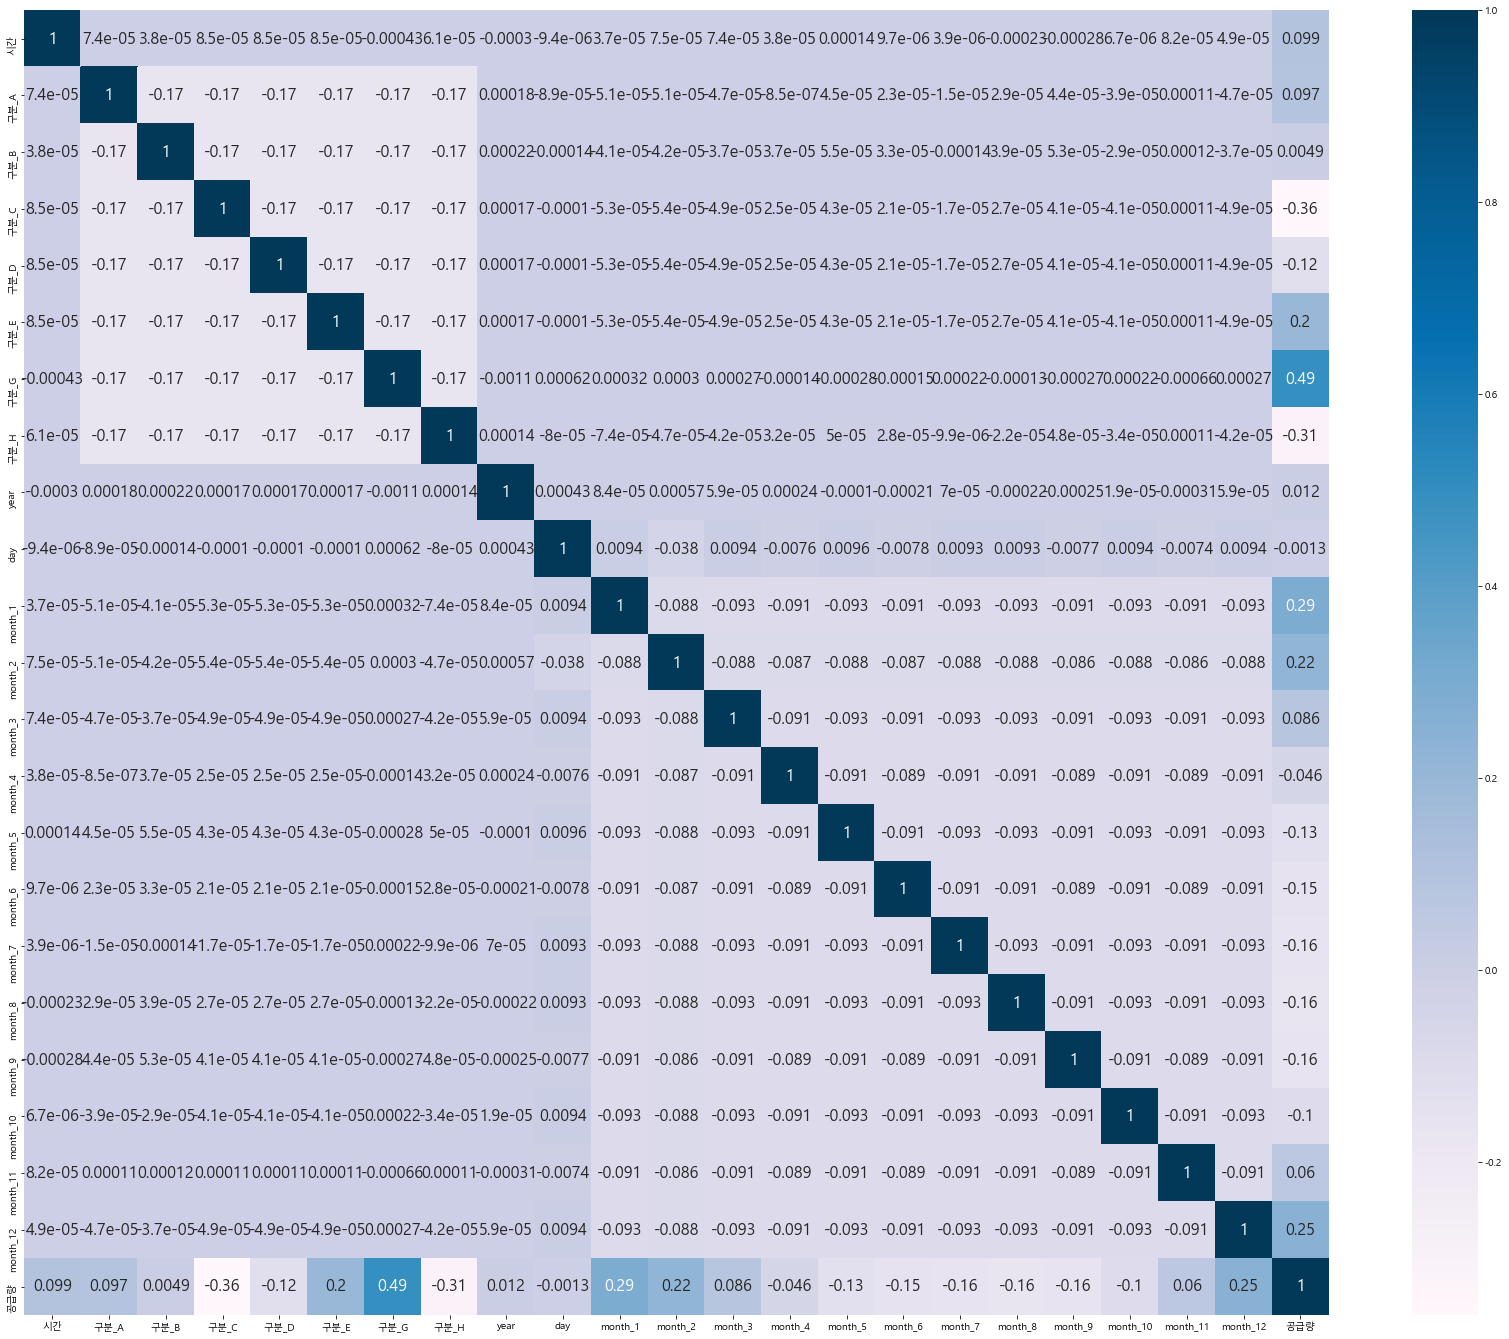

In [102]:
colormap = plt.cm.PuBu
plt.figure(figsize=(30, 24))
sns.heatmap(heatmap_data.astype(float).corr(),square = True, cmap = colormap, linecolor = "white",
            annot = True, annot_kws = {"size" : 16})

In [23]:
train_time, test_time = train_test_split(time, test_size= 0.2 , shuffle = True)

In [24]:
val_time, test_time = train_test_split(time, test_size= 0.5 , shuffle = True)

In [25]:
features = ['시간', '구분_A', '구분_B', '구분_C', '구분_D', '구분_E', '구분_G',
       '구분_H', 'year', 'day', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12']

In [26]:
train_x = train_time[features]
train_y = train_time['공급량']

test_x = test_time[features]
test_y = test_time['공급량']

val_x = val_time[features]
val_y = val_time['공급량']

# XGB

In [27]:
from xgboost import XGBRegressor

train = xgb.DMatrix(data=train_x, label = train_y)
val = xgb.DMatrix(data=val_x, label = val_y)
wlist = [(train, 'train'), (val,'eval')]

params = {
    'learning_rate': 0.05,
    'objective': 'reg:squarederror',
    'metric':'mae', 
    'seed':42
}

model = xgb.train(params, train, 500, evals=wlist, verbose_eval=20, early_stopping_rounds=100)

[15:43:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "metric" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:1267.67102	eval-rmse:1261.78564
[20]	train-rmse:578.59564	eval-rmse:575.50946
[40]	train-rmse:362.50678	eval-rmse:360.51675
[60]	train-rmse:283.47394	eval-rmse:282.10449
[80]	train-rmse:244.28767	eval-rmse:243.35294
[100]	train-rmse:221.91067	eval-rmse:221.27628
[120]	train-rmse:208.48314	eval-rmse:208.01935
[140]	train-rmse:198.49159	eval-rmse:198.21408
[160]	train-rmse:191.63464	eval-rmse:191.47783
[180]	train-rmse:186.16603	eval-rmse:186.11371
[200]	train-rmse:181.53500	eval-rmse:181.56314
[220]	train-rmse:177.41609	eval-rmse:177.51648
[240]	train-rmse:173.26134	eval-rmse:173.43007
[260]	t

In [28]:
test_xD = xgb.DMatrix(test_x)

In [29]:
test_y= pd.DataFrame(test_y)
test_y

,공급량
335805,294.593
44925,2520.717
97625,2534.325
360958,324.374
295482,1679.175
...,...
75317,607.333
153467,310.853
149081,1022.797
296091,1597.188


In [30]:
test_y1 = model.predict(test_xD)
test_y1=pd.DataFrame(test_y1)

In [31]:
def nmae(true_df, pred_df):
   
    true = true_df.iloc[:].to_numpy()
    pred = pred_df.iloc[:].to_numpy()
    
    score = np.mean((np.abs(true-pred))/true)
    
    return score

In [32]:
nmae(test_y,test_y1)

0.4117647114186052

# LGBM

In [45]:
d_train = lgb.Dataset(train_x, train_y)
d_val = lgb.Dataset(val_x, val_y)

params = {
    'objective': 'regression',
    'metric':'mae',
    'seed':42
}

model1 = lgb.train(params, d_train, 500, d_val, verbose_eval=20, early_stopping_rounds=10)

C:\Users\ie\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\ie\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 294326, number of used features: 23
[LightGBM] [Info] Start training from score 948.681391
Training until validation scores don't improve for 10 rounds
[20]	valid_0's l1: 88.0948
[40]	valid_0's l1: 12.0653
[60]	valid_0's l1: 5.50001
[80]	valid_0's l1: 5.17153
[100]	valid_0's l1: 5.09361
[120]	valid_0's l1: 5.01987
[140]	valid_0's l1: 4.96381
[160]	valid_0's l1: 4.93017
[180]	valid_0's l1: 4.90624
[200]	valid_0's l1: 4.87935
[220]	valid_0's l1: 4.85556
[240]	valid_0's l1: 4.83335
[260]	valid_0's l1: 4.81454
[280]	valid_0's l1: 4.79592
[300]	valid_0's l1: 4.77872
[320]	valid_0's l1: 4.76014
[340]	valid_0's l1: 4.74607
[360]	valid_0's l1: 4.73222
[380]	valid_0's l1: 4.72176


In [46]:
test_y2 = model1.predict(test_x)

In [47]:
test_y2=pd.DataFrame(test_y2)

In [48]:
nmae(test_y,test_y2)

0.0069830801872853366

# LSTM

In [118]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

In [119]:
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

NameError: name 'train_feature' is not defined

# 연도별

In [49]:
year

,날짜(발전),공급량(발전),날짜(도시가스),공급량(도시가스)
0,2009-12-18,55799,2009-12-18,94277
1,2010-12-24,67628,2010-01-13,104767
2,2011-01-13,72800,2011-01-17,106836
3,2012-12-27,74811,2012-02-02,112192
4,2013-12-20,76961,2013-01-03,115117
5,2014-01-10,79948,2014-12-17,103013
6,2015-02-09,70516,2015-02-09,94215
7,2016-01-25,73667,2016-01-25,110417
8,2017-12-12,90084,2017-12-13,109715
9,2018-01-26,95908,2018-01-26,128714


In [50]:
year['총합']= year['공급량(발전)']+year['공급량(도시가스)']

In [51]:
year

,날짜(발전),공급량(발전),날짜(도시가스),공급량(도시가스),총합
0,2009-12-18,55799,2009-12-18,94277,150076
1,2010-12-24,67628,2010-01-13,104767,172395
2,2011-01-13,72800,2011-01-17,106836,179636
3,2012-12-27,74811,2012-02-02,112192,187003
4,2013-12-20,76961,2013-01-03,115117,192078
5,2014-01-10,79948,2014-12-17,103013,182961
6,2015-02-09,70516,2015-02-09,94215,164731
7,2016-01-25,73667,2016-01-25,110417,184084
8,2017-12-12,90084,2017-12-13,109715,199799
9,2018-01-26,95908,2018-01-26,128714,224622


<AxesSubplot:>

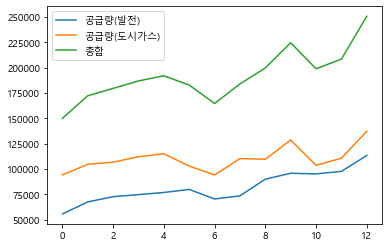

In [52]:
year.plot()

# 월별

In [53]:
month

,단위(Ton),1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2017,135090,135299,110430,80656,66917,74456,80432,73353,66251,69464,120512,159175
1,2018,168335,155493,124240,104391,88658,87822,89148,88223,72283,95837,117538,153090
2,2019,157563,141622,118815,106413,83858,77248,105601,86183,77179,85633,119653,155943
3,2020,167138,158943,135775,104649,79721,87007,92255,103153,101055,108353,132915,18167


In [66]:
del month['단위(Ton)']

<AxesSubplot:>

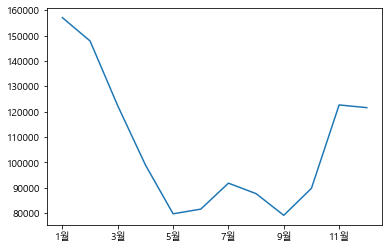

In [68]:
month.mean().plot()

# 지역별

In [54]:
area.head()

,연월,서울,인천,경기,강원,충청,전북,광주,대구,부산,제주
0,Jan-16,1110948,539952,884621,77545,275615,230249,220168,355646,553342,NaN
1,Feb-16,911323,441262,769085,63447,231933,178604,200121,299373,462628,NaN
2,Mar-16,718859,387889,682050,55284,197986,193081,210464,271042,464287,NaN
3,Apr-16,417299,288915,453910,33572,106757,137068,157493,208573,319444,NaN
4,May-16,354428,278423,375331,44665,119412,153391,145237,198135,307294,NaN


In [55]:
del area['제주']

In [69]:
b=area.describe()
b

,서울,인천,경기,강원,충청,전북,광주,대구,부산
count,6.000000e+01,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,6.966163e+05,389564.666667,6.511786e+05,76786.800000,171622.566667,202090.016667,197696.983333,242337.733333,511485.900000
std,2.735010e+05,88999.625166,2.290027e+05,30136.992029,67889.962094,46244.471892,45860.849741,67743.910333,135622.426753
min,3.512690e+05,211570.000000,3.317900e+05,28905.000000,89995.000000,113151.000000,114869.000000,148228.000000,290538.000000
25%,4.780748e+05,316103.750000,4.688955e+05,55533.000000,117821.750000,164617.500000,165160.000000,185581.000000,422928.000000
50%,5.676945e+05,398278.000000,5.718970e+05,66845.000000,137967.500000,196295.000000,196263.000000,211510.500000,495213.500000
75%,8.886475e+05,446824.500000,8.201528e+05,95690.000000,224548.250000,225616.250000,221916.750000,288347.750000,578443.500000
max,1.306019e+06,580969.000000,1.158498e+06,150852.000000,316138.000000,326679.000000,296531.000000,385199.000000,820778.000000


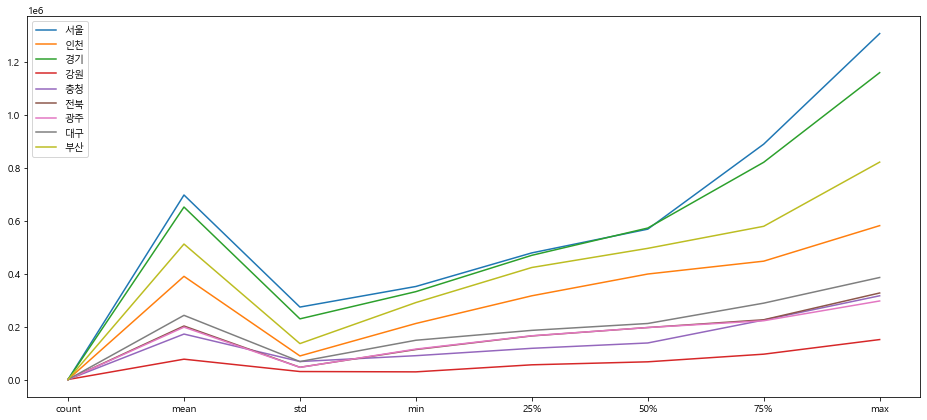

In [59]:
plt.figure(figsize=(16,7))
plt.plot(b)
plt.legend(b)

None


# 최대,최소

In [60]:
mm.head()

,년도,구분,최대공급월,최대공급량,최소공급월,최소공급량
0,2016,발전,11,1675857,4,875314
1,2016,시설이용,7,130597,4,47120
2,2016,도시가스,1,2623661,8,786742
3,2016,직공급,1,21957,9,13611
4,2016,총공급량,1,4270043,5,1992217


In [61]:
mm[mm['구분']=='총공급량']

,년도,구분,최대공급월,최대공급량,최소공급월,최소공급량
4,2016,총공급량,1,4270043,5,1992217
9,2017,총공급량,12,4934417,9,1987523
14,2018,총공급량,1,5218376,9,2168497
19,2019,총공급량,1,4884467,9,2315358
24,2020,총공급량,12,5216968,5,2161085
